# Analyze Results

This notebook loads `analysis_results.csv` produced by `evaluate_solutions.py` and plots key comparisons.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('analysis_results.csv')
display(df.head())
print(f"Rows: {len(df)} | Columns: {list(df.columns)}")

,problem,lang,human_MI,llm_MI,human_CC,llm_CC,human_comments,llm_comments,why_ratio_h,why_ratio_l,diff_ratio,fan_in_h,fan_in_l,fan_out_h,fan_out_l,imports_h,imports_l,coupling_idx_h,coupling_idx_l
0,simple_binary_search,Python,76.357554,81.559735,4.000000,4.000000,0.032258,0.090909,0.0,0.000000,0.796875,0.000,0.0,0.000,0.0,1.0,1.0,1.000,1.0
1,simulated_annealing,Python,58.859309,77.310107,6.000000,3.500000,0.092857,0.190476,0.0,0.000000,0.871921,0.000,1.0,0.000,1.0,5.0,2.0,1.667,3.0
2,topological_sort,Python,88.034218,81.525441,6.000000,3.000000,0.315789,0.657143,0.0,0.004854,0.863014,0.000,0.5,0.000,0.5,0.0,0.0,0.000,1.0
3,shell_sort,Python,78.623483,87.638602,6.000000,5.000000,0.093023,0.387097,0.0,0.000000,0.837838,0.000,0.0,0.000,0.0,1.0,0.0,1.000,0.0
4,hill_climbing,Python,54.629018,84.305130,2.888889,2.333333,0.085000,0.207547,0.0,0.000000,0.928854,0.333,0.0,0.333,0.0,3.0,0.0,1.000,0.0


Rows: 50 | Columns: ['problem', 'lang', 'human_MI', 'llm_MI', 'human_CC', 'llm_CC', 'human_comments', 'llm_comments', 'why_ratio_h', 'why_ratio_l', 'diff_ratio', 'fan_in_h', 'fan_in_l', 'fan_out_h', 'fan_out_l', 'imports_h', 'imports_l', 'coupling_idx_h', 'coupling_idx_l']


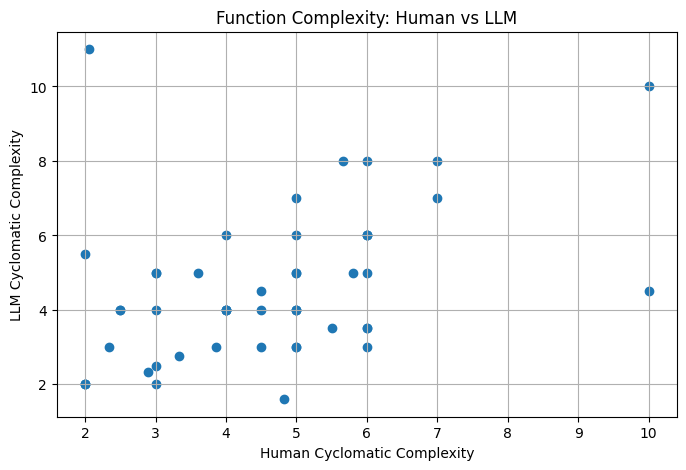

In [2]:
# Scatter: Human vs LLM Cyclomatic Complexity
plt.figure(figsize=(8,5))
plt.scatter(df['human_CC'], df['llm_CC'])
plt.xlabel('Human Cyclomatic Complexity')
plt.ylabel('LLM Cyclomatic Complexity')
plt.title('Function Complexity: Human vs LLM')
plt.grid(True)
plt.show()

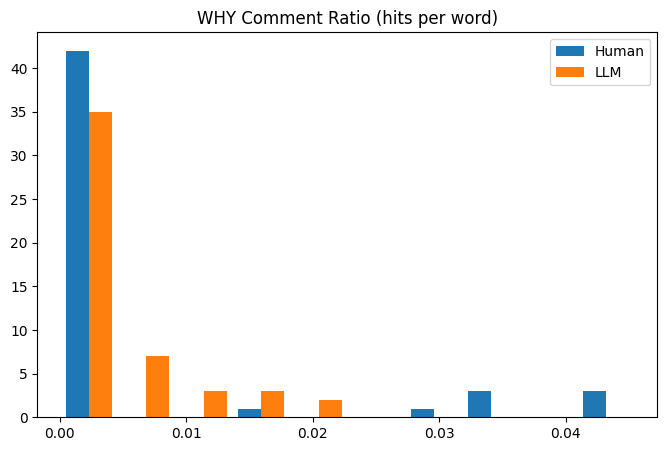

In [3]:
# Histogram: WHY/WHAT comment ratio
plt.figure(figsize=(8,5))
plt.hist([df['why_ratio_h'].dropna(), df['why_ratio_l'].dropna()], label=['Human','LLM'])
plt.legend()
plt.title('WHY Comment Ratio (hits per word)')
plt.show()

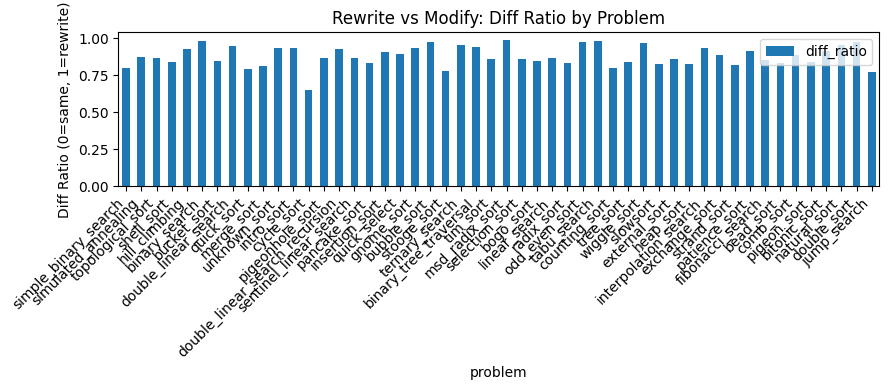

In [4]:
# Bar: Diff ratio per problem
ax = df[['problem','diff_ratio']].set_index('problem').plot(kind='bar', figsize=(9,4))
ax.set_ylabel('Diff Ratio (0=same, 1=rewrite)')
ax.set_title('Rewrite vs Modify: Diff Ratio by Problem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
# Summary stats
display(df.describe(include='all'))

,problem,lang,human_MI,llm_MI,human_CC,llm_CC,human_comments,llm_comments,why_ratio_h,why_ratio_l,diff_ratio,fan_in_h,fan_in_l,fan_out_h,fan_out_l,imports_h,imports_l,coupling_idx_h,coupling_idx_l
count,50,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,50,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,simple_binary_search,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,72.383903,81.729325,4.567062,4.563667,0.072451,0.274196,0.005520,0.003413,0.879161,0.247260,0.211680,0.247260,0.211680,1.120000,0.460000,1.082040,0.725720
std,NaN,NaN,13.634965,18.156274,1.798680,2.020125,0.060892,0.120156,0.013348,0.005865,0.068769,0.373967,0.348813,0.373967,0.348813,1.171777,0.734291,0.861896,0.936211
min,NaN,NaN,39.041109,0.000000,2.000000,1.600000,0.013559,0.080000,0.000000,0.000000,0.653061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,65.430492,80.384356,3.000000,3.000000,0.032787,0.192724,0.000000,0.000000,0.835803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068250,0.000000
50%,NaN,NaN,76.613325,84.680003,4.659091,4.000000,0.047646,0.281439,0.000000,0.000000,0.866106,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,81.277744,89.398263,5.766667,5.375000,0.098810,0.353795,0.000000,0.006762,0.934222,0.500000,0.500000,0.500000,0.500000,2.000000,1.000000,1.667000,1.000000


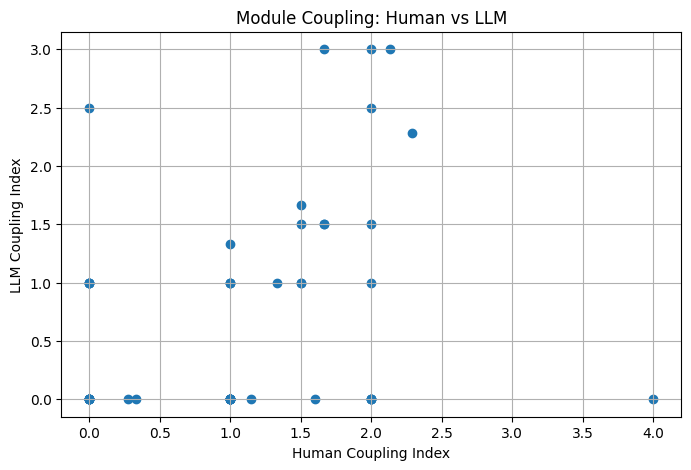

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(df["coupling_idx_h"], df["coupling_idx_l"])
plt.xlabel("Human Coupling Index")
plt.ylabel("LLM Coupling Index")
plt.title("Module Coupling: Human vs LLM")
plt.grid(True)
plt.show()
